C:\Users\rchan\AppData\Local\Temp\ipykernel_21552\632764325.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



PV Recycling Analysis Summary Report
Analysis for Year 2050

Total Waste Mass: 11,565.73 kilo tonnes

Cost Breakdown (in Crores INR):
------------------------------
Collection Cost: ₹925.40 Cr
Transport Cost: ₹1,055.95 Cr
Processing Cost: ₹5,130.00 Cr
Labor Cost: ₹1,046.36 Cr
Total Cost: ₹8,157.71 Cr

Material Recovery Benefits (in Crores INR):
----------------------------------------
Glass: ₹638.37 Cr
Aluminum: ₹2,879.87 Cr
Silicon: ₹1,562.33 Cr
Copper: ₹863.96 Cr
Silver: ₹3,455.84 Cr
Total Benefit: ₹9,400.37 Cr

Net Value: ₹1,242.66 Cr



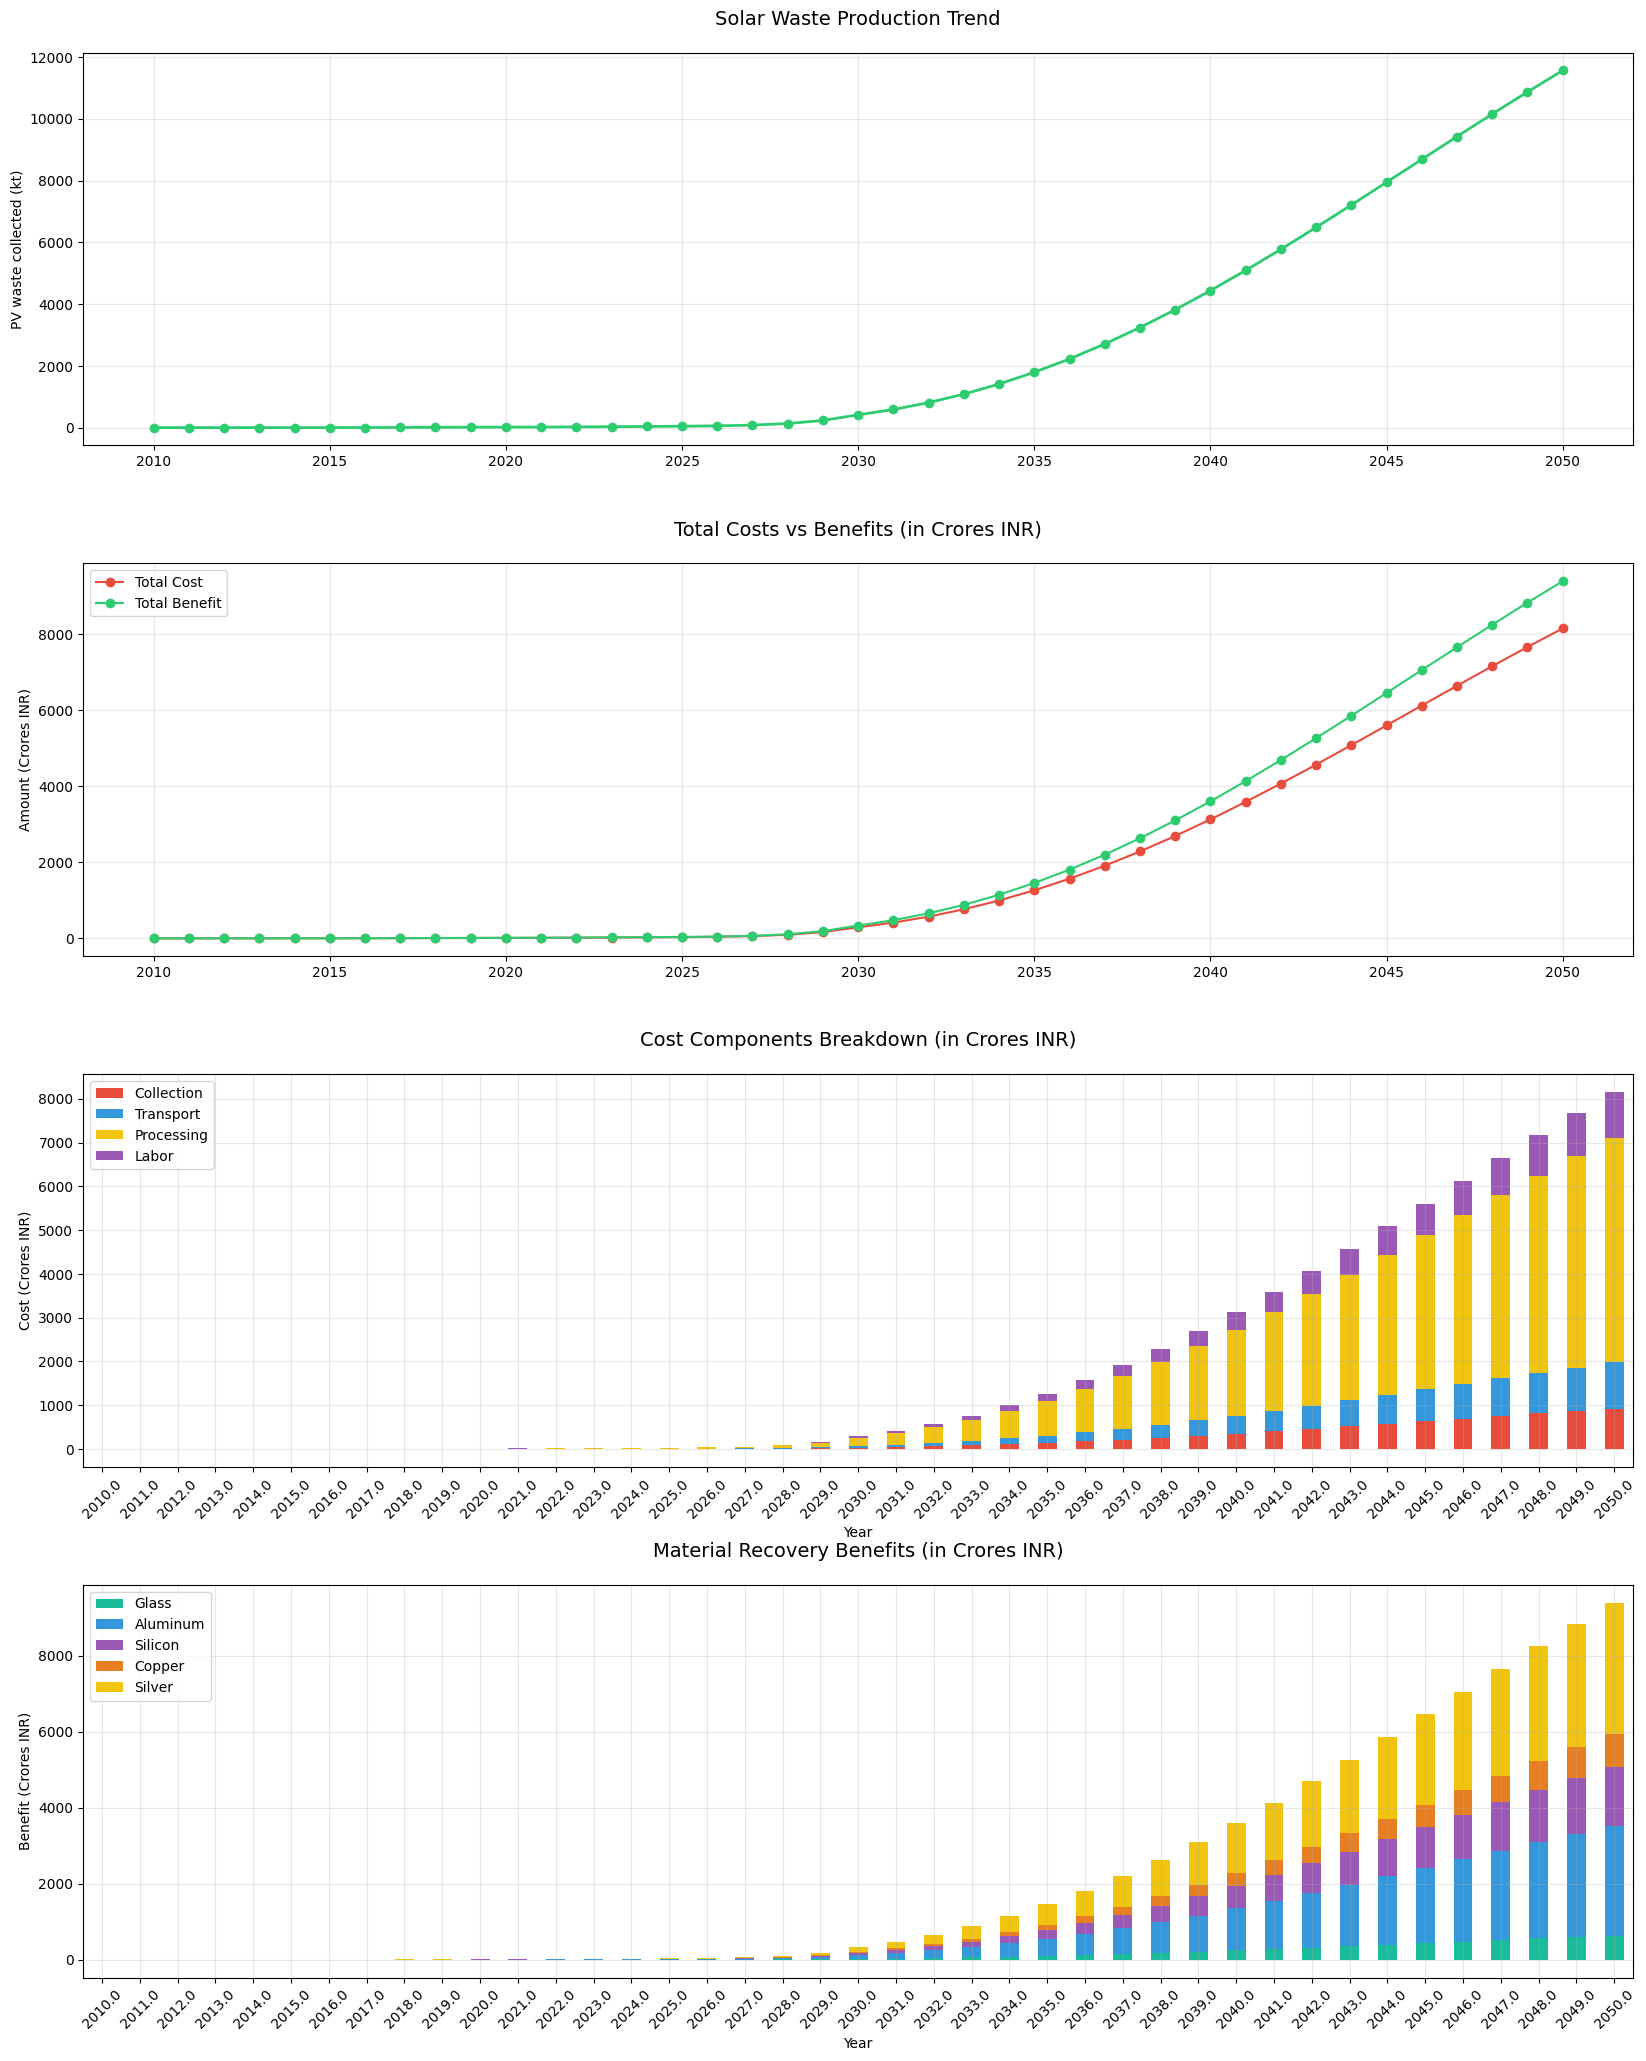

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class PVRecyclingAnalysis:
    def __init__(self):
        # Constants
        self.USD_TO_INR = 83
        self.COLLECTION_COST = 9.64 * self.USD_TO_INR  # INR/tonne
        self.TRANSPORT_COST = 0.011 * self.USD_TO_INR  # INR/tonne-km
        self.TRANSPORT_DISTANCE = 1000  # km
        self.PROCESSING_COST = 53.44 * self.USD_TO_INR  # INR/tonne
        self.LABOR_COST = 1090 * self.USD_TO_INR  # INR/worker/year
        self.WORKER_CAPACITY = 100  # tonnes/worker/year

        # Material recovery rates and prices
        self.materials = {
            'glass': {'recovery': 0.665, 'price': 10* self.USD_TO_INR},
            'aluminum': {'recovery': 0.03, 'price': 1000  * self.USD_TO_INR},
            'silicon': {'recovery': 0.00651, 'price': 2500* self.USD_TO_INR},
            'copper': {'recovery': 0.003, 'price': 3000 * self.USD_TO_INR},
            'silver': {'recovery': 0.0006, 'price': 60000* self.USD_TO_INR}
        }

    def calculate_costs(self, installed_capacity_mw):
        """Calculate various costs associated with PV recycling."""
        waste_mass = installed_capacity_mw 
        
        collection_cost = waste_mass * self.COLLECTION_COST
        transport_cost = waste_mass * self.TRANSPORT_COST * self.TRANSPORT_DISTANCE
        processing_cost = waste_mass * self.PROCESSING_COST
        
        workers_needed = np.ceil(waste_mass / self.WORKER_CAPACITY)
        labor_cost = workers_needed * self.LABOR_COST
        
        total_cost = collection_cost + transport_cost + processing_cost + labor_cost
        
        return {
            'waste_mass': waste_mass,
            'collection_cost': collection_cost,
            'transport_cost': transport_cost,
            'processing_cost': processing_cost,
            'labor_cost': labor_cost,
            'total_cost': total_cost
        }

    def calculate_benefits(self, waste_mass):
        """Calculate benefits from recovered materials."""
        benefits = {}
        total_benefit = 0
        
        for material, data in self.materials.items():
            recovered_mass = waste_mass * data['recovery']
            benefit = recovered_mass * data['price']
            benefits[f'{material}_benefit'] = benefit
            total_benefit += benefit
            
        benefits['total_benefit'] = total_benefit
        return benefits

    def analyze_data(self, data_file):
        """Perform complete analysis on the input data."""
        # Read data
        df = pd.read_csv(data_file)
        
        # Calculate costs and benefits
        results = []
        for _, row in df.iterrows():
            costs = self.calculate_costs(row['W_EL'])
            benefits = self.calculate_benefits(costs['waste_mass'])
            
            result = {
                'year': row['Year'],
                'installed_capacity': row['W_EL'],
                **costs,
                **benefits,
                'net_value': benefits['total_benefit'] - costs['total_cost']
            }
            results.append(result)
            
        return pd.DataFrame(results)

    def create_visualizations(self, results_df):
        """Create various visualizations of the analysis results."""
        # Set style
        
        # Create figure with subplots
        fig = plt.figure(figsize=(20, 25))
        gs = fig.add_gridspec(4, 1, hspace=0.3)
        
        # 1. Installed Capacity Trend
        ax1 = fig.add_subplot(gs[0])
        ax1.plot(results_df['year'], results_df['installed_capacity'].div(1000), 
                marker='o', linewidth=2, color='#2ecc71')
        ax1.set_title('Solar Waste Production Trend', pad=20, fontsize=14)
        ax1.set_ylabel('PV waste collected (kt)')
        ax1.grid(True, alpha=0.3)
        
        # 2. Costs vs Benefits
        ax2 = fig.add_subplot(gs[1])
        ax2.plot(results_df['year'], results_df['total_cost']/10000000, 
                label='Total Cost', marker='o', color='#e74c3c')
        ax2.plot(results_df['year'], results_df['total_benefit']/10000000, 
                label='Total Benefit', marker='o', color='#2ecc71')
        ax2.set_title('Total Costs vs Benefits (in Crores INR)', pad=20, fontsize=14)
        ax2.set_ylabel('Amount (Crores INR)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. Cost Components
        cost_components = ['collection_cost', 'transport_cost', 
                         'processing_cost', 'labor_cost']
        cost_data = results_df[cost_components].div(10000000)
        ax3 = fig.add_subplot(gs[2])
        cost_data.plot(kind='bar', stacked=True, ax=ax3, 
                      color=['#e74c3c', '#3498db', '#f1c40f', '#9b59b6'])
        ax3.set_title('Cost Components Breakdown (in Crores INR)', pad=20, fontsize=14)
        ax3.set_xlabel('Year')
        ax3.set_ylabel('Cost (Crores INR)')
        ax3.legend(labels=['Collection', 'Transport', 'Processing', 'Labor'])
        ax3.grid(True, alpha=0.3)
        plt.xticks(range(len(results_df)), results_df['year'], rotation=45)
        
        # 4. Material Benefits
        material_columns = [col for col in results_df.columns if '_benefit' in col 
                          and col != 'total_benefit']
        benefit_data = results_df[material_columns].div(10000000)
        ax4 = fig.add_subplot(gs[3])
        benefit_data.plot(kind='bar', stacked=True, ax=ax4,
                         color=['#1abc9c', '#3498db', '#9b59b6', '#e67e22', '#f1c40f'])
        ax4.set_title('Material Recovery Benefits (in Crores INR)', pad=20, fontsize=14)
        ax4.set_xlabel('Year')
        ax4.set_ylabel('Benefit (Crores INR)')
        ax4.legend(labels=[col.replace('_benefit', '').capitalize() 
                         for col in material_columns])
        ax4.grid(True, alpha=0.3)
        plt.xticks(range(len(results_df)), results_df['year'], rotation=45)
        
        plt.tight_layout()
        return fig

    def generate_summary_report(self, results_df):
        """Generate a summary report of the analysis."""
        latest_year = results_df.iloc[-1]
        
        report = f"""
PV Recycling Analysis Summary Report
===================================
Analysis for Year {int(latest_year['year'])}

Total Waste Mass: {latest_year['waste_mass']/1000:,.2f} kilo tonnes

Cost Breakdown (in Crores INR):
------------------------------
Collection Cost: ₹{latest_year['collection_cost']/10000000:,.2f} Cr
Transport Cost: ₹{latest_year['transport_cost']/10000000:,.2f} Cr
Processing Cost: ₹{latest_year['processing_cost']/10000000:,.2f} Cr
Labor Cost: ₹{latest_year['labor_cost']/10000000:,.2f} Cr
Total Cost: ₹{latest_year['total_cost']/10000000:,.2f} Cr

Material Recovery Benefits (in Crores INR):
----------------------------------------
Glass: ₹{latest_year['glass_benefit']/10000000:,.2f} Cr
Aluminum: ₹{latest_year['aluminum_benefit']/10000000:,.2f} Cr
Silicon: ₹{latest_year['silicon_benefit']/10000000:,.2f} Cr
Copper: ₹{latest_year['copper_benefit']/10000000:,.2f} Cr
Silver: ₹{latest_year['silver_benefit']/10000000:,.2f} Cr
Total Benefit: ₹{latest_year['total_benefit']/10000000:,.2f} Cr

Net Value: ₹{latest_year['net_value']/10000000:,.2f} Cr
"""
        return report

def main():
    # Initialize analyzer
    analyzer = PVRecyclingAnalysis()
    
    # Perform analysis
    results = analyzer.analyze_data('solar_waste_projections.csv')
    
    # Create visualizations
    fig = analyzer.create_visualizations(results)
    plt.savefig('pv_recycling_analysis.png', dpi=300, bbox_inches='tight')
    
    # Generate and print summary report
    report = analyzer.generate_summary_report(results)
    print(report)
    
    # Save results to CSV
    results.to_csv('pv_recycling_analysis_results.csv', index=False)

if __name__ == "__main__":
    main()